# Project Description

We work in the online store "Streamchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

Data is available up to 2016. Let's imagine that it's December 2016, and we are planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers".

## Step 1. Data Overview

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are no obvious duplicates in the data:

In [4]:
df.duplicated().sum()

0

According to the data documentation:

* `Name` — the name of the game
* `Platform` — platform
* `Year_of_Release` — year of release
* `Genre` — the genre of the game
* `NA_sales` — sales in North America (millions of copies sold)
* `EU_sales` — sales in Europe (millions of copies sold)
* `JP_sales` — sales in Japan (millions of copies sold)
* `Other_sales` — sales in other countries (millions of copies sold)
* `Critic_Score` — critics' score (maximum 100)
* `User_Score` — user rating (maximum 10)
* `Rating` — rating from the ESRB organization (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

### Conclusion

Data consists of 11 columns and 16715 rows without obvious duplicates, but with N/A values in data.

## Step 2. Data Processing

### Replace the column names (lower case)

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Converting data to the required types

For further analysis, it is important for us to know the year of release, but this information is missing in the data in some lines. Since the number of missing data is not particularly large relative to the total array (<2%), we can remove these rows.
We will also replace the data type in the `year_of_release` column with an integer one.

We will also remove the rows with missing data in the `genre` and `name` column. These rows do not carry much value, because it is 1983 without ratings. Perhaps the omission of the name occurred due to a technical error.

We will not fill in the missing values in `critic_score`, `user_score`, `rating`, because this can greatly affect the results of the research. The missing values may simply mean that no data regarding the rating of the game was found for these lines, but at the same time the lines carry important information regarding sales and the platform.

In [6]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df[df['genre'].notna()]

In [9]:
df = df[df['year_of_release'].notna()]
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Check other columns:

In [10]:
df['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [11]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [12]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In the `user_score` column, the value **'tbd'** is specified - To Be Determined. I.e., the score has not been set (it is planned to be determined). So we need to replace this value with a omission. We also need to change the data type to float

In [13]:
df['user_score'].where(df['user_score'] != 'tbd', np.nan, inplace = True)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Calculation of total sales in all regions

In [15]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Conclusion

* Replaced column names (led to lower case);

* The data has been converted to the required types;

* Gaps have been processed if necessary;

* The abbreviation 'tbd' in the user rating column has been processed;

* The total sales in all regions are calculated and recorded in a separate column.

## Step 3. Research data analysis

### Analysis of sales by platforms

As can be seen from the chart - the growth of the number of games began somewhere in 1993 and reached its peak in 2007-2008, the most interesting period for us is most likely 2000 - 2016.

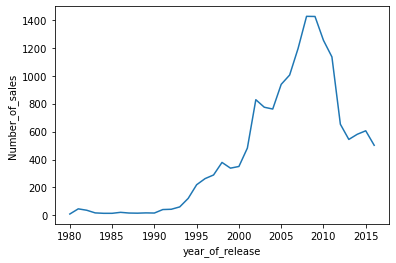

In [16]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='line')
plt.ylabel('Number_of_sales');

According to the number of sales for the entire period, there are 6 clearly distinguished platforms.

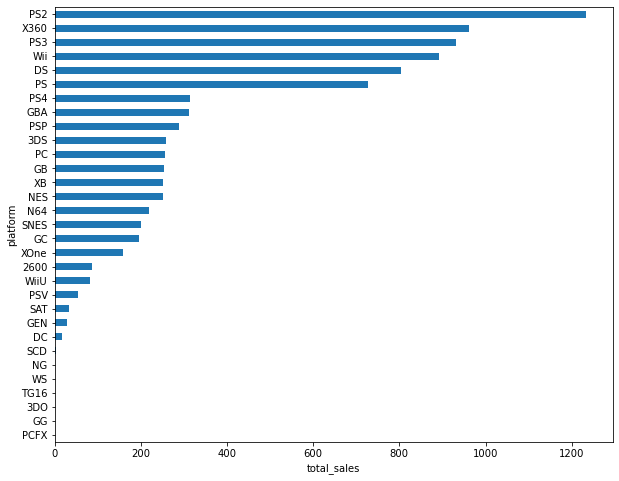

In [17]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.xlabel('total_sales');

Let's leave the top 18 platforms by number of sales and evaluate them by year:

In [18]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(18)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


### Identifying potentially profitable platforms

In [19]:
# list of top_18_platforms
top_platforms = list(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(18)['platform'])

In [20]:
# total sales by platforms and year of release
sales_top = df.query('platform in @top_platforms').pivot_table(index=['year_of_release','platform'],
                                                               values='total_sales',aggfunc='sum').reset_index()
sales_top

,year_of_release,platform,total_sales
0,1983,NES,10.96
1,1984,NES,50.08
2,1985,DS,0.02
3,1985,NES,53.44
4,1985,PC,0.04
...,...,...,...
180,2016,PS3,3.60
181,2016,PS4,69.25
182,2016,Wii,0.18
183,2016,X360,1.52


Make charts `'total_sales'` / `'year'` by `platform`:

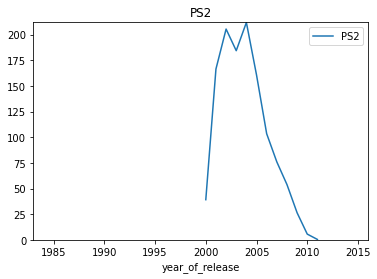

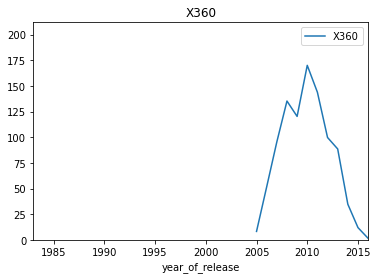

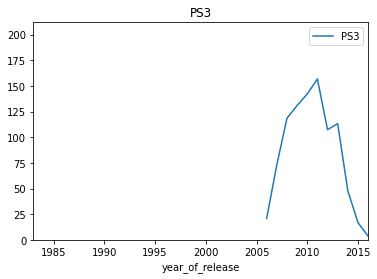

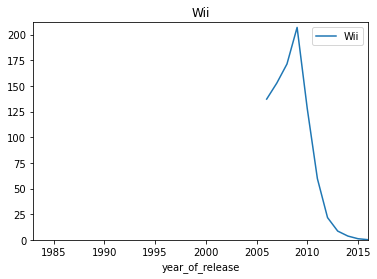

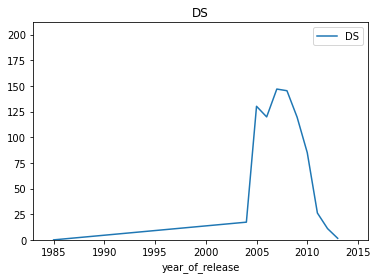

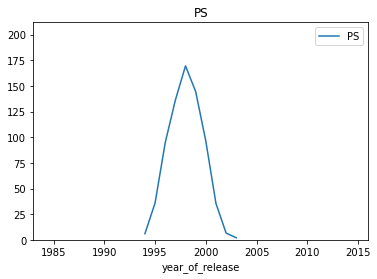

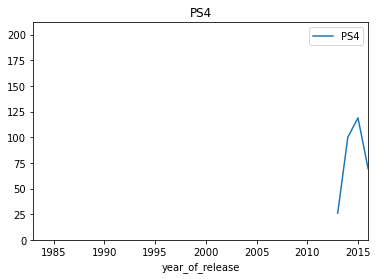

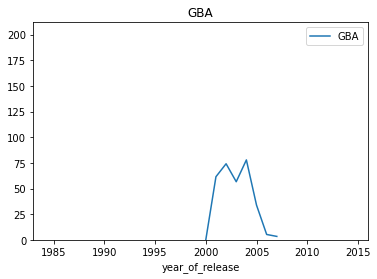

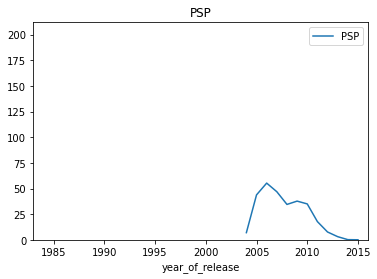

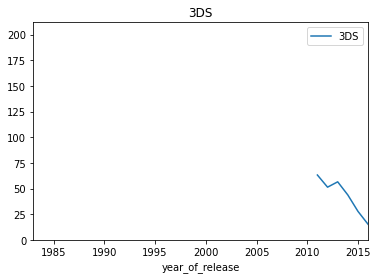

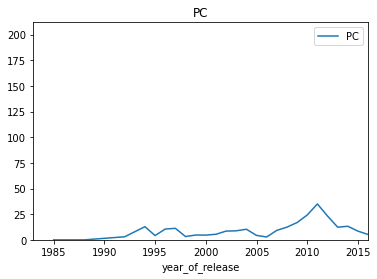

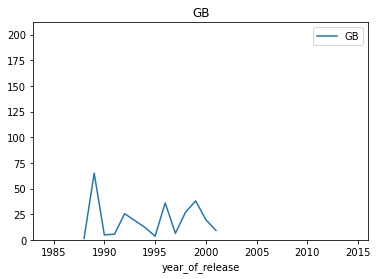

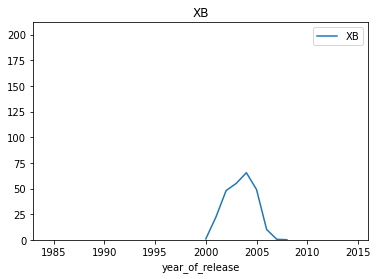

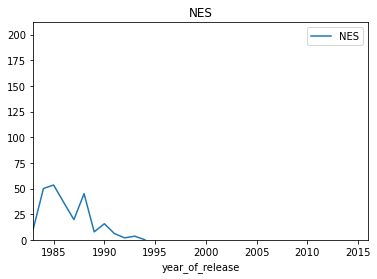

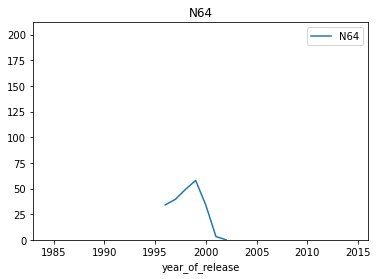

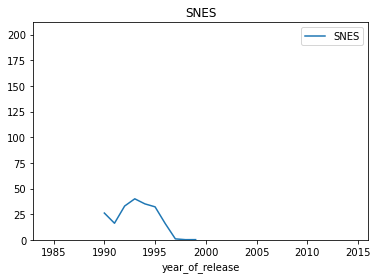

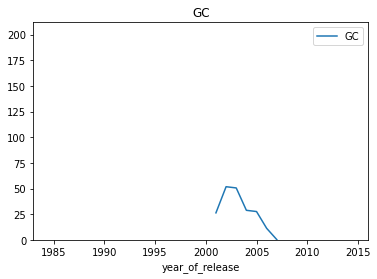

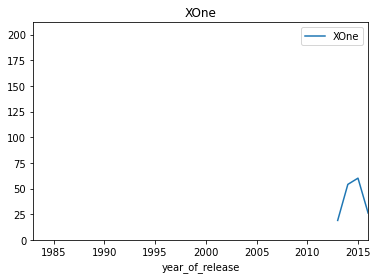

In [21]:
# plot all charts separately
for i in top_platforms:
    sales_top[sales_top['platform']==i].plot(x='year_of_release',y='total_sales',xlim=(1983,2016),
                                             ylim=(0,max(sales_top['total_sales'])),title=i,label=i)

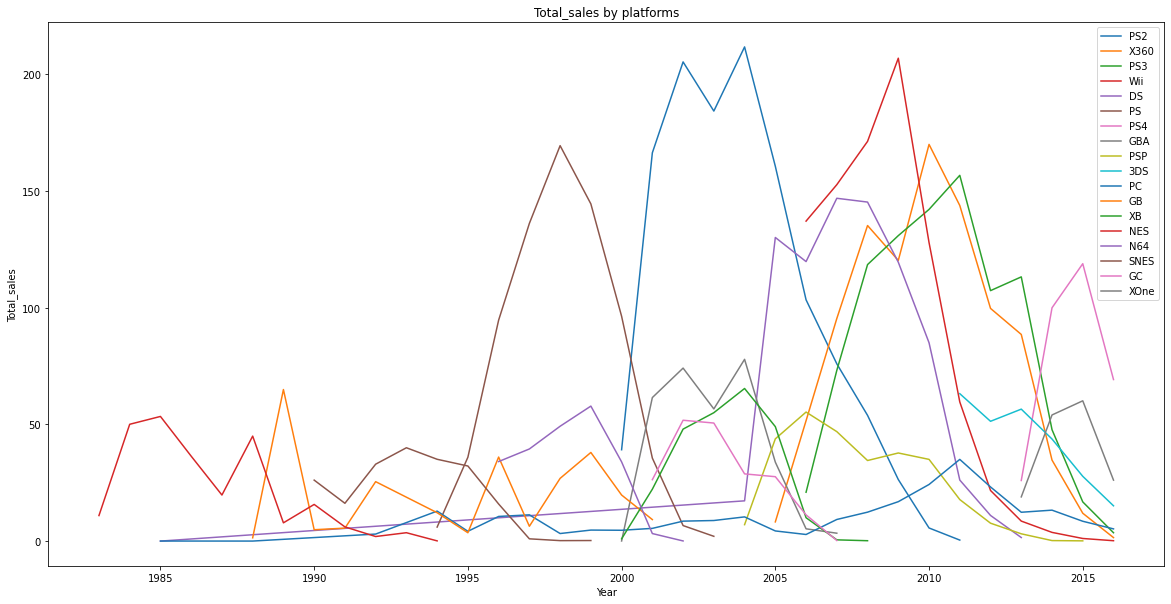

In [22]:
# plot all charts
plt.figure(figsize=(20,10))

for i in top_platforms:
    plt.plot(sales_top[sales_top['platform']==i]['year_of_release'], 
             sales_top[sales_top['platform']==i]['total_sales'], label=i)

plt.legend()
plt.title('Total_sales by platforms')
plt.xlabel('Year')
plt.ylabel('Total_sales');

Based on the charts, we can make some conclusions:

1) The approximate time of the "rise" and "fall" of the popularity of the platform is about **7-10 years**;

2) Some platforms can be discarded, because they have lost their relevance (such as N64, NES, XB, GB, GBA, PS, DS, etc.). We can discard platforms that have not had sales in the last 2-3 years. The probability that these platforms will become popular is almost zero;

3) Against the background of all stand out:
* PS4, XONE and 3DS, because they have only recently passed their peak (or they lack data for 2016);
* PC - because this platform almost always has stable sales.

4) Sales on all platforms are falling;

Having analyzed the data on potential platforms and taking into account that computer games are an extremely dynamically changing industry, we assume that the relevant period for analysis will be the previous **2-3 years** (2014-2016):

In [23]:
potential_platforms=[]
for i in top_platforms:
    max_year = sales_top[sales_top['platform'] == i]['year_of_release'].max()
    if max_year >= 2014:
        potential_platforms.append(i)
    print(f'Last year of sales {i} - {max_year}')
print()
print(f'List of potential platforms: {potential_platforms}')

Last year of sales PS2 - 2011
Last year of sales X360 - 2016
Last year of sales PS3 - 2016
Last year of sales Wii - 2016
Last year of sales DS - 2013
Last year of sales PS - 2003
Last year of sales PS4 - 2016
Last year of sales GBA - 2007
Last year of sales PSP - 2015
Last year of sales 3DS - 2016
Last year of sales PC - 2016
Last year of sales GB - 2001
Last year of sales XB - 2008
Last year of sales NES - 1994
Last year of sales N64 - 2002
Last year of sales SNES - 1999
Last year of sales GC - 2007
Last year of sales XOne - 2016

List of potential platforms: ['X360', 'PS3', 'Wii', 'PS4', 'PSP', '3DS', 'PC', 'XOne']


So, we need data for the period 2014-2016 for our potential platforms:

In [24]:
top_pot_plat = sales_top.query('year_of_release >= 2014 and platform in @potential_platforms')

In [25]:
list(top_pot_plat['platform'].unique())

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'Wii', 'X360', 'XOne']

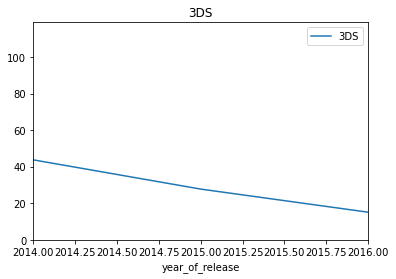

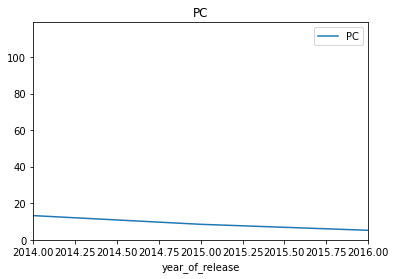

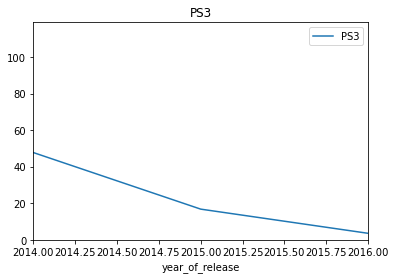

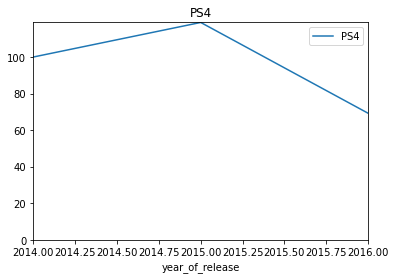

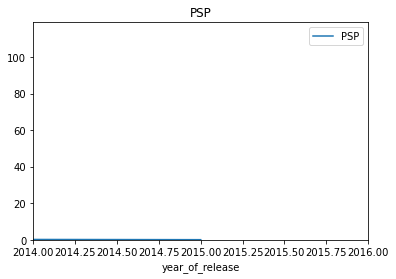

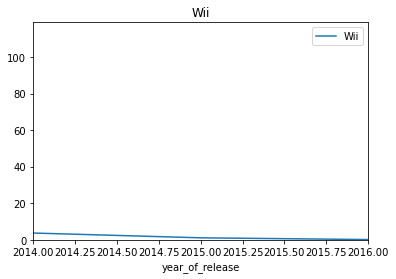

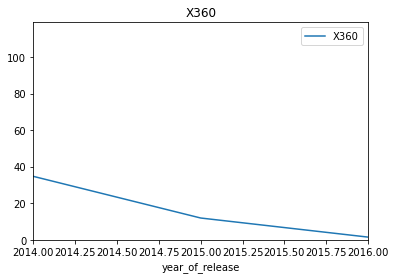

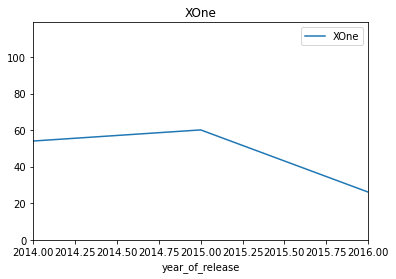

In [26]:
# plot all charts of top potential platforms separatly
for i in list(top_pot_plat['platform'].unique()):
    top_pot_plat[top_pot_plat['platform']==i].plot(x='year_of_release',y='total_sales',xlim=(2014,2016),ylim=(0,max(top_pot_plat['total_sales'])),title=i,label=i)

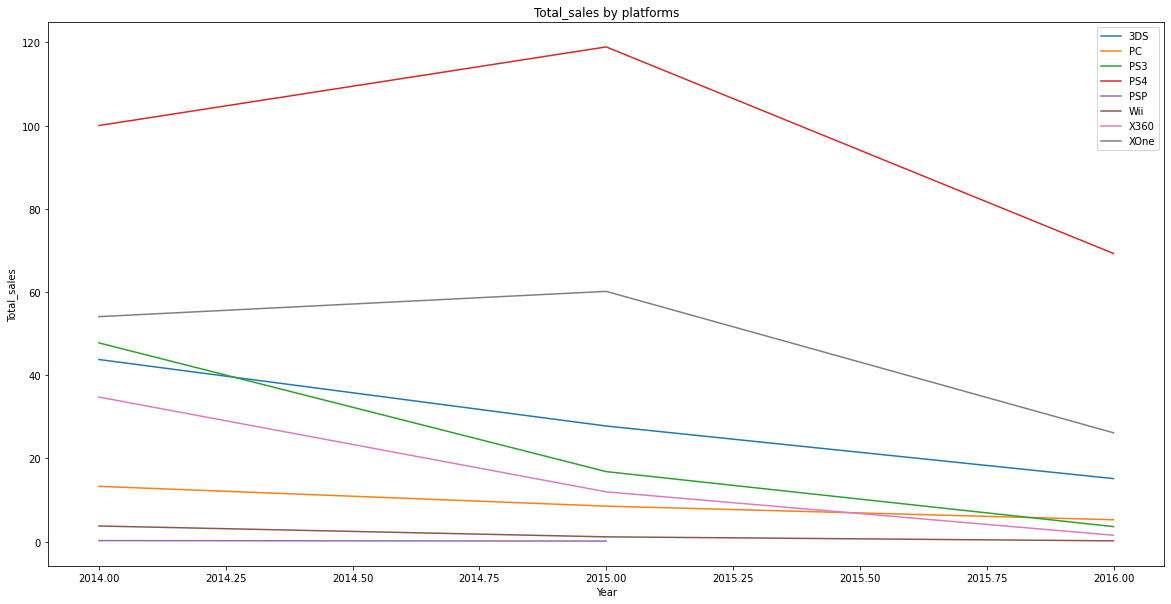

In [27]:
# plot all charts of top potential platforms
plt.figure(figsize=(20,10))

for i in list(top_pot_plat['platform'].unique()):
    plt.plot(top_pot_plat[top_pot_plat['platform']==i]['year_of_release'], 
             top_pot_plat[top_pot_plat['platform']==i]['total_sales'], label=i)

plt.legend()
plt.title('Total_sales by platforms')
plt.xlabel('Year')
plt.ylabel('Total_sales');

As you can see on the charts - PS3, PSP, Wii and X360 are not potentially profitable platforms, because their sales for the current period are very small (or not at all). These platforms should be excluded from the analysis.

It is also worth noting that the PC should not be excluded from the analysis, because if you look at the overall sales schedule for all years on this platform, you can conclude that this platform has not fully outlived itself.

In [28]:
bad_pot_plat = ['PS3', 'PSP', 'Wii', 'X360']

In [29]:
# excluded bad platforms
top_pot_plat = top_pot_plat.query('platform not in @bad_pot_plat')
top_pot_plat_list = list(top_pot_plat['platform'].unique())

In [30]:
df_sales = df.loc[:,['platform', 'total_sales']].query('platform in @top_pot_plat_list')
df_sales

,platform,total_sales
31,PS4,14.63
33,3DS,14.60
40,3DS,12.65
42,PS4,12.62
47,3DS,11.68
...,...,...
16690,PC,0.01
16692,PC,0.01
16696,PC,0.01
16702,PC,0.01


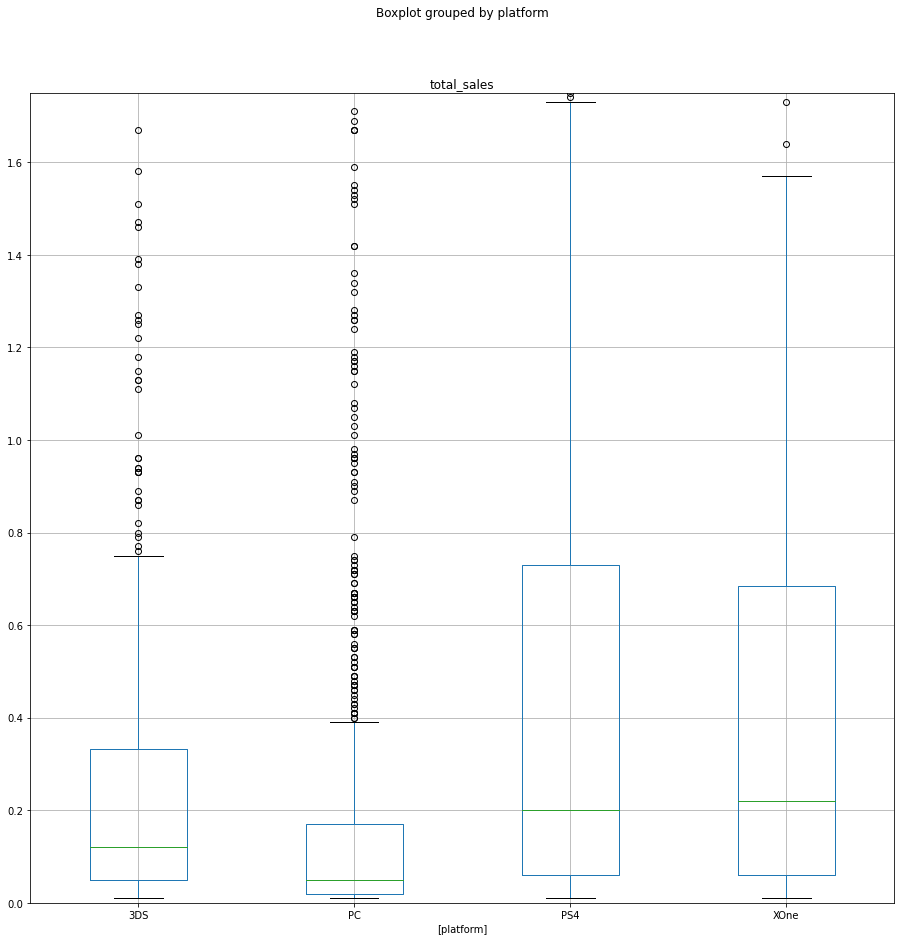

In [31]:
boxplot = df_sales.boxplot(column=['total_sales' ], by = ['platform'], figsize=(15,15))
plt.ylim(0,1.75);

According to the graphs, it can be concluded that:

* all platforms have a large number of outliers. Visually, it seems that XOne has the lowest number of outliers compared to other platforms;

* the PC platform has the smallest range (the difference between 75% and 25% quartilies), which indicates more homogeneous data compared to other platforms;

* XONE and PS4 have the largest median values and quite equal parameters (approximately equal median values and quartile values);

* the 3DS platform is situated between PC and XOne/PS4 in terms of parameters.

### Analysis of the impact of user and critics ratings on sales

Analysis of the impact of user and critics ratings on sales using the example of the platform with the largest number of reviews:

In [32]:
df_score = df.query('year_of_release > 2005 and platform in @potential_platforms').pivot_table(index='platform', 
                                                                                    values=['critic_score','user_score'], 
                                                                                    aggfunc='count')
df_score['total_scores'] = df_score['critic_score'] + df_score['user_score']
df_score.sort_values(by='total_scores', ascending=False)

,critic_score,user_score,total_scores
platform,,,
X360,878,929,1807
PS3,804,861,1665
PC,575,615,1190
Wii,568,548,1116
PSP,377,343,720
PS4,252,257,509
XOne,169,182,351
3DS,166,171,337


As can be seen from the table, the X360 has the largest number of total reviews since 2005, so on its basis we will analyze the dependence of reviews on the number of sales

Corr. coef: 0.39630669748604197


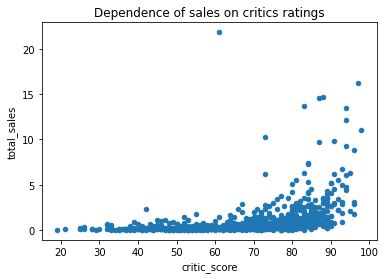

In [33]:
df.query('year_of_release > 2005 and platform == "X360"').plot(x='critic_score', 
                                                               y='total_sales', kind='scatter', 
                                                               title = 'Dependence of sales on critics ratings')

print('Corr. coef:',df.query('year_of_release > 2005 and platform == "X360"')['total_sales'].
      corr(df.query('year_of_release > 2005 and platform == "X360"')['critic_score']))

The correlation coefficient can be said not to be large, but the graph shows that the dependence is exponential, and therefore the coefficient is actually much higher, we can conclude that the higher the ratings of critics - the higher the sales **(by exponential dependence)**

Corr. coef: 0.11576213224310153


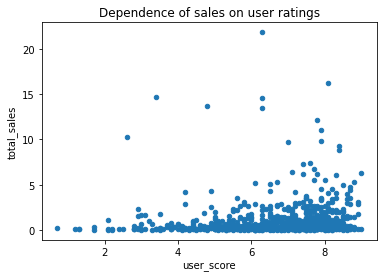

In [34]:
df.query('year_of_release > 2005 and platform == "X360"').plot(x='user_score', 
                                                               y='total_sales', kind='scatter', 
                                                               title = 'Dependence of sales on user ratings')

print('Corr. coef:',df.query('year_of_release > 2005 and platform == "X360"')['total_sales'].
      corr(df.query('year_of_release > 2005 and platform == "X360"')['user_score']))

In the case of user ratings, the situation is not so obvious, but there is still a dependence - higher ratings - higher sales, but not so obviously. It can be concluded that **critics' ratings have a greater impact** on sales than user ratings.

In [35]:
def correlation(platform,score):
    df.query('year_of_release > 2005 and platform == @platform').plot(x=score, y='total_sales', 
                                                                      kind='scatter', title = platform)
    print('Corr. coef:',i,df.query('year_of_release > 2005 and platform == @platform')['total_sales'].
          corr(df.query('year_of_release > 2005 and platform == @platform')[score]))

Corr. coef: X360 0.11576213224310153
Corr. coef: PS3 0.12841562938563028
Corr. coef: Wii 0.11283121360773782
Corr. coef: PS4 -0.031957110204556424
Corr. coef: PSP 0.2416513950112825
Corr. coef: 3DS 0.22207843643390884
Corr. coef: PC -0.020555707172675488
Corr. coef: XOne -0.06892505328279412


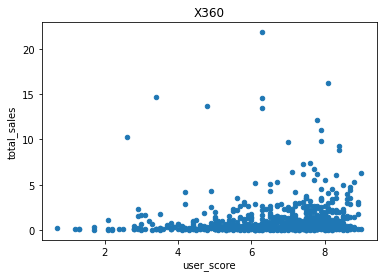

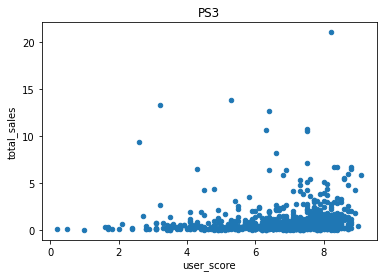

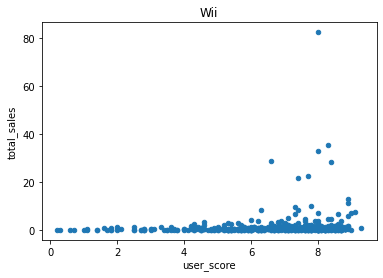

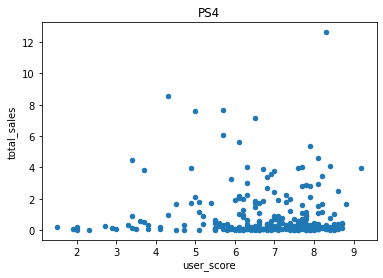

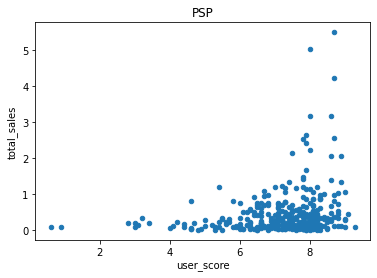

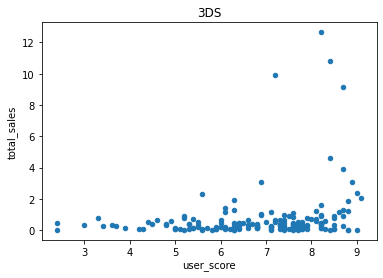

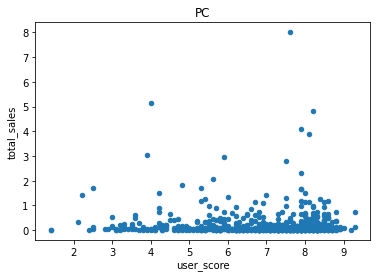

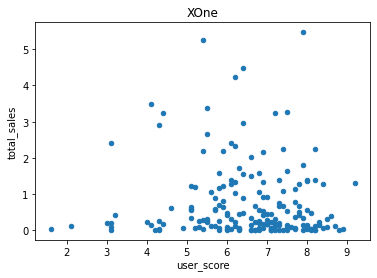

In [36]:
for i in potential_platforms:
    correlation(i,'user_score')

In general, for most of the tested platforms, the dependence is direct exponential (the higher the user rating, the higher the sales). But the coefficients of some platforms are negative - this is due to the fact that the coefficient indicates a linear convergence, and the graphs show that the dependence is exponential.

Corr. coef: X360 0.39630669748604197
Corr. coef: PS3 0.4327589578997134
Corr. coef: Wii 0.17790728577594914
Corr. coef: PS4 0.406567902061781
Corr. coef: PSP 0.3153395717519695
Corr. coef: 3DS 0.34873973059848346
Corr. coef: PC 0.28691932992361385
Corr. coef: XOne 0.41699832800840175


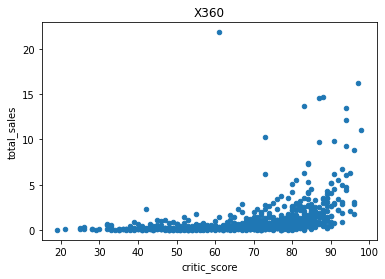

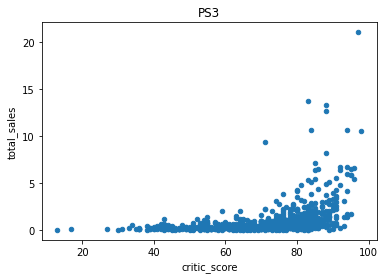

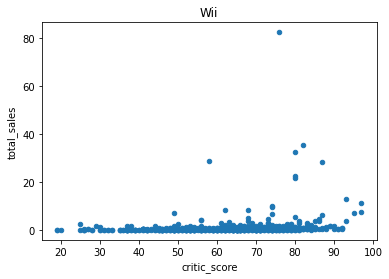

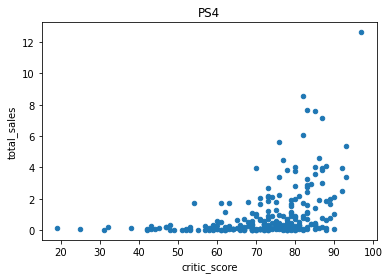

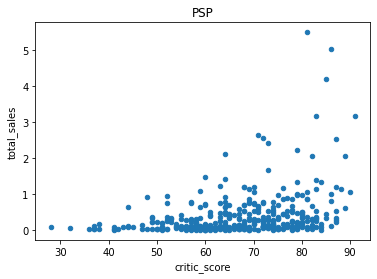

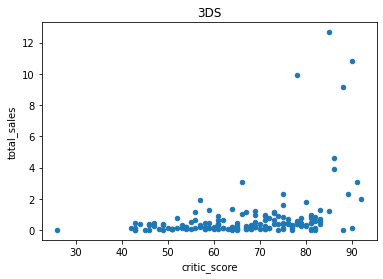

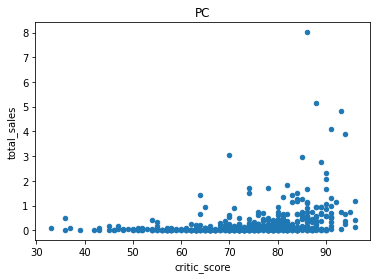

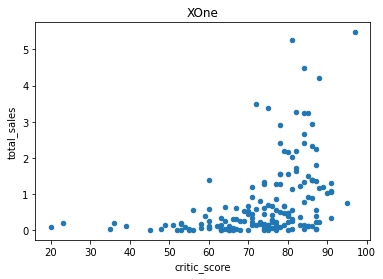

In [37]:
for i in potential_platforms:
    correlation(i,'critic_score')

In general, the dependence on all tested platforms is direct exponential (the higher the critics' rating, the higher the sales).

It is also worth noting that the assumption was confirmed that critics' ratings have a greater impact on sales than user ratings (this can be seen by the correlation coefficient)

### Analysis of games by genre

Total sales is an unsuitable metric for finding the most profitable genre. High overall sales figures may hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It is necessary to find a genre where games consistently bring high income - for this it is worth considering average or median sales

Analysis of sales by genre by the period we are interested in:

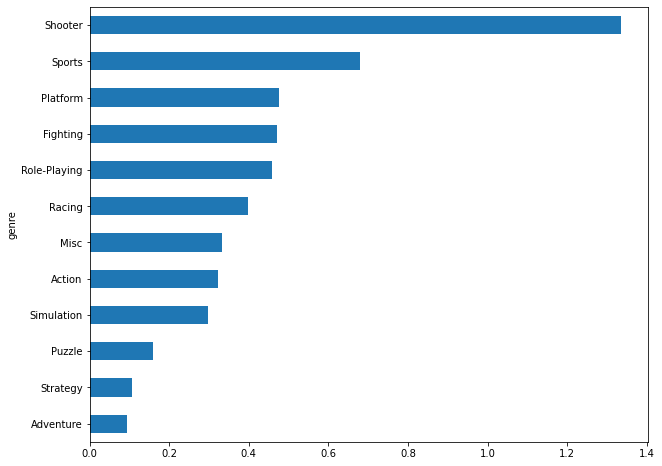

In [38]:
df.query('year_of_release >= 2014').groupby('genre')['total_sales'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

As can be seen from the average price chart, games from the Shooter, Sports and Platform genres have the highest sales.

Strategy and Adventure clearly have the lowest sales.

But we need to see what results we will get if we analyze the median values.

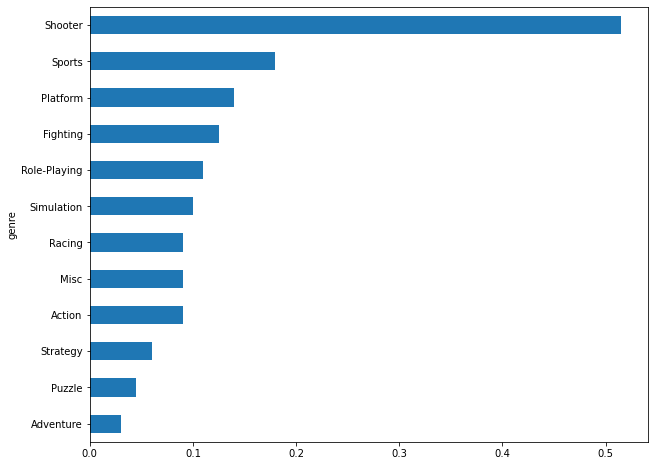

In [39]:
df.query('year_of_release >= 2014').groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

According to the median price chart, it is clear that the genres of games in the top coincide, but the outsiders have slightly changed the order.

In general, we can say that the comparison by median values is more correct, because it takes into account "outliers" that may affect the result of the analysis.

### Conclusion

* The approximate time of the "rise" and "fall" of the popularity of the platform is about 7-10 years;

* Potential high sales platforms are 3DS, PC, PS4, XOne

* Critics' ratings have a greater impact on sales than users' rating

* Shooter, Sports and Platform genres have the highest sales

## Step 4. Portrait of the user of each region

### The most popular platforms

Sales shares by platform and region (in general and among the TOP 5 platforms):

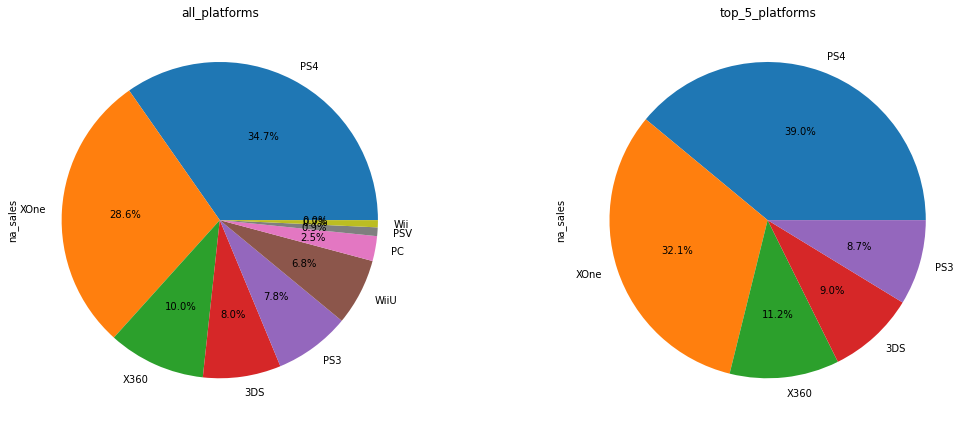

In [40]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release >= 2014').groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release >= 2014').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **NA** region, the best-selling platforms among all platforms are PS4 (34.7%), XOne (28.6%), X360 (10%), 3DS (8%), PS3 (7.8%).

In the **NA** region, the best-selling platforms among the TOP 5 platforms are PS4 (39.0%), XOne (32.1%), X360 (11.2%), 3DS (9%), PS3 (8.7%).

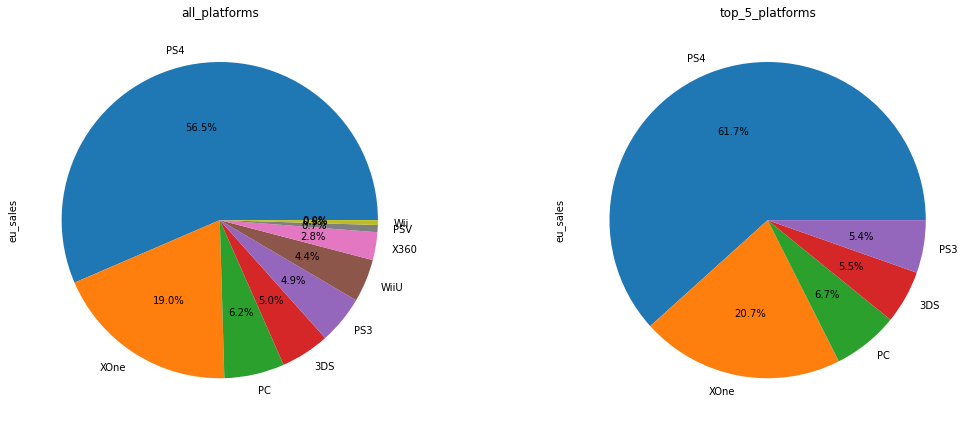

In [41]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release > 2014').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release > 2014').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **EU** region, the best-selling platforms among all platforms are PS4 (56.5%), XOne (19%), PC (6.2%), 3DS(5%), PS3(4.9%).

In the **EU** region, the best-selling platforms among the TOP 5 platforms are PS4 (61.7%), XOne (20.7%), PC (6.7%), 3DS(5.5%), PS3(5.4%).

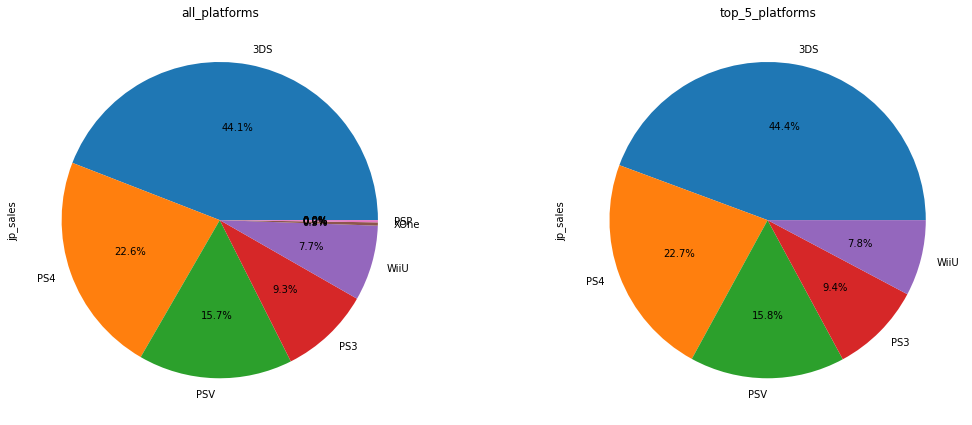

In [42]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release > 2014').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release > 2014').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **JP** region, the best-selling platforms among all platforms are 3DS (44.1%), PS4 (22.6%), PSV (15.7%), PS3 (9.3%), WiiU (7.7%).

In the **JP** region, the best-selling platforms among the TOP 5 platforms are 3DS (44.4%), PS4 (22.7%), PSV (15.8%), PS3 (9.4%), WiiU (7.8%).

We conclude that the **best-selling platforms and their proportions differ depending on the region**.

### The most popular genres

We will conduct a similar analysis by genre:

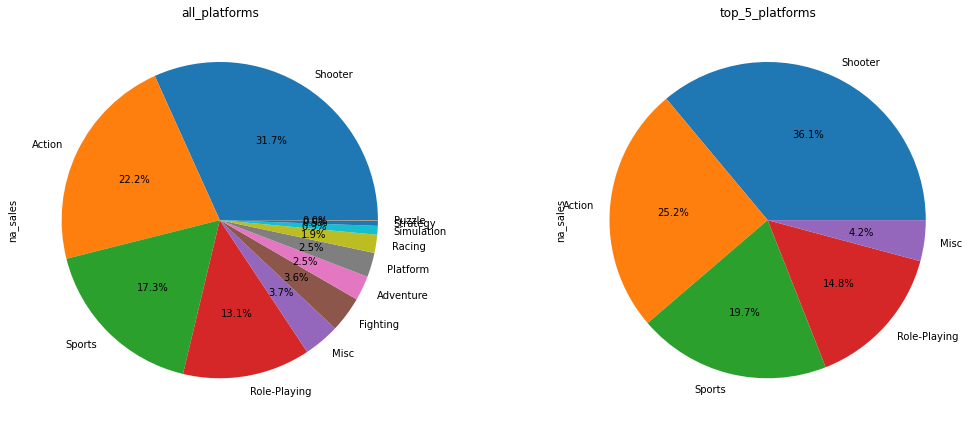

In [43]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release > 2014').groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release > 2014').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **NA** region, the best-selling genres among all genres are Shooter (31.7%), Action (22.2%), Sports (17.3%), Role-Playing (13.1%), Misc (3.7%). 

In the **NA** region, the best-selling genres among the TOP 5 genres are Shooter (36.1%), Action (25.2%), Sports (19.7%), Role-Playing (14.8%), Misc (4.2%). 

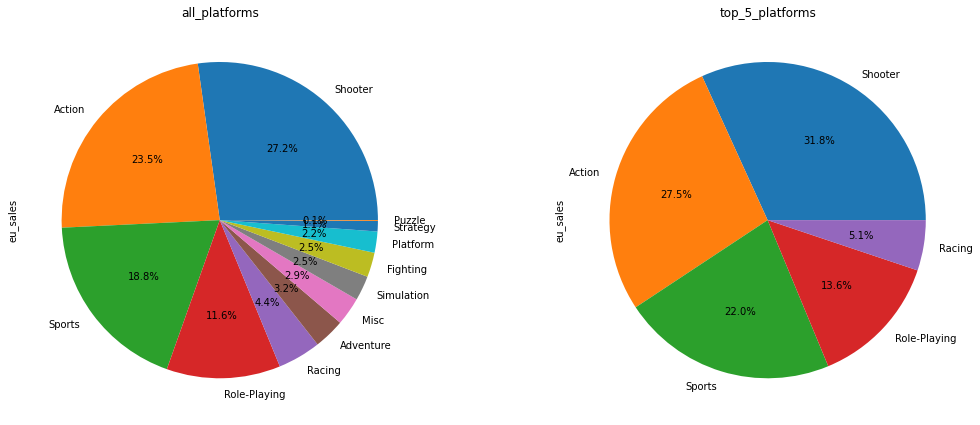

In [44]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release > 2014').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release > 2014').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **EU** region, the best-selling genres among all genres are Shooter (27.2%), Action (23.5%), Sports (18.8%), Role-Playing (11.6%), Racing (4.4%).

In the **EU** region, the best-selling genres among the TOP 5 genres are Shooter (31.8%), Action (27.5%), Sports (22%), Role-Playing (13.6%), Racing (5.1%).

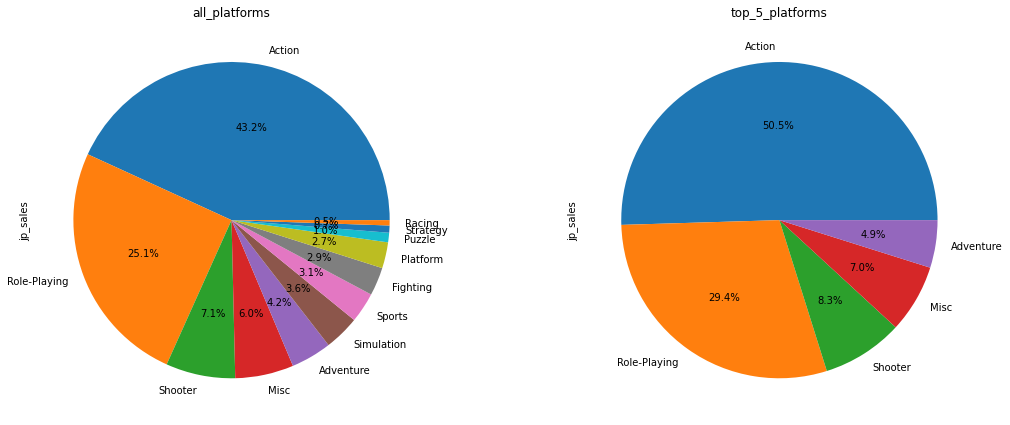

In [45]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df.query('year_of_release > 2014').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')
ax_2 = fig.add_subplot(2, 2, 2)
df.query('year_of_release > 2014').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(18,16), autopct='%1.1f%%')

ax_1.set(title = 'all_platforms', xticks=[], yticks=[])
ax_2.set(title = 'top_5_platforms', xticks=[], yticks=[])

plt.show()

In the **JP** region, the best-selling genres among all genres are Action (43.2%), Role-Playing (25.1%), Shooter (7.1%), Misc (6%), Adventure (4.2%)

In the **JP** region, the best-selling genres among the TOP 5 genres are Action (50.5%), Role-Playing (29.4%), Shooter (8.3%), Misc (7%), Adventure (4.9%)

As can be seen from the diagrams - **NA** and **EU** regions are generally similar in popular genres, but the **JP** region stands out strongly.

In general, these differences are most likely caused by the fact that each region has its own culture, which greatly affects consumer demand for platforms and genres.

Also, the popularity of the platform most likely also depends on the preferred genre.

### The impact of age rating on sales in each region

In [46]:
df['rating'] = df['rating'].fillna('No_rating')

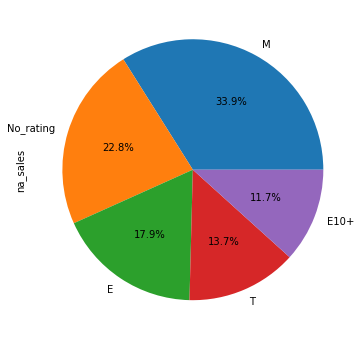

In [47]:
df.query('year_of_release >= 2014').groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%');

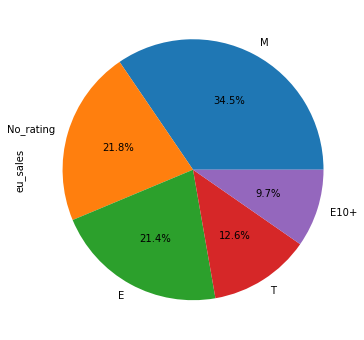

In [48]:
df.query('year_of_release >= 2014').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%');

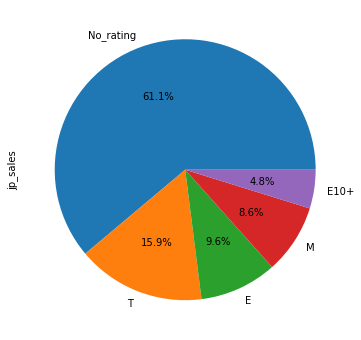

In [49]:
df.query('year_of_release >= 2014').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%');

From the diagrams, it can be concluded that the distribution of sales shares depending on the age rating in the **EU** and **NA** region coincides (1st place - M, 2nd place - No_rating, 3rd place - E, 4th place - T, 5th place - E10+). Which indicates a general target audience.

But in the **JP** region, most of the games are unrated, followed by T, E, M and E10+. Here the **target audience differs significantly from other regions.**

In general, these differences are most likely caused by the fact that each region has its own culture

## Step 5. Hypothesis testing

### Test the hypothesis that the average user ratings of XONE and PC are the same:

H0 - null hypothesis: average user ratings of XONE and PC are the same

H1 - alternative hypothesis: the average user ratings of XONE and PC do not match

In [50]:
df = df[df['user_score'].notna()]

In [51]:
alpha = .01

xone = df.query('year_of_release >= 2014 and platform == "XOne"')['user_score']
pc = df.query('year_of_release >= 2014 and platform == "PC"')['user_score']
results = st.ttest_ind(xone, pc)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We cannot reject the hypothesis')
else:
    print('We reject the hypothesis')

p-value:  0.10450507919348415
We cannot reject the hypothesis


In this case, the critical significance value was assumed to be 0.01. The p_value value is greater than the alpha value, which tells us that the hypothesis that the average user ratings of XONE and PC are the same cannot be rejected.

### Test the hypothesis that the average user ratings of the Action and Sports genres are different

H0 - the null hypothesis: the average user ratings of the Action and Sports genres coincide

H1 - alternative hypothesis: average user ratings of Action and Sports genres coincide

In [52]:
alpha = .01

xone = df.query('year_of_release >= 2014 and genre == "Action"')['user_score']
pc = df.query('year_of_release >= 2014 and genre == "Sports"')['user_score']
results = st.ttest_ind(xone, pc)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We cannot reject the hypothesis')
else:
    print('We reject the hypothesis')

p-value:  2.8711147985105864e-19
We reject the hypothesis


In this case, the critical significance value was assumed to be 0.01. The p_value value is much less than the alpha value, which tells us that the hypothesis that the average user ratings of the Action and Sports genres coincide should be rejected.

## General Conclusion

1) The initial data were prepared and processed (the presence of duplicates was checked, unnecessary information and omissions were removed, the columns were reduced to the same type)

2) A research analysis of the data was carried out, the actual period was identified, the sales of platforms by year were analyzed, potentially profitable platforms were identified, the dependence of estimates on sales was determined

3) A portrait of the user has been compiled for each region (the main age groups, platforms and genres have been identified)

4) The hypothesis that the average user ratings of the Action and Sport genres coincide was also refuted. And it was concluded that the hypothesis that the average user ratings of XONE and PC are the same cannot be rejected.